In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
ds = pd.read_csv('hot_1000.csv', names = ['user_id', 'flair', 'n_posts'], skiprows = 1)

In [3]:
team_names = pd.read_csv('teams', names = ['name', 'abbrs'])

In [4]:
team_dict = team_names.set_index('name').to_dict()['abbrs']
team_fulls = team_names['name'].to_list()
team_abbrs = team_names['abbrs'].to_list()

In [5]:
# get rid of the weired pandas float nan
ds.loc[ds['flair'].isnull().values, 'flair'] = 'NONE'

In [6]:
def flair2team(flair, team_dict, team_fulls, team_abbrs):
    # transform all flairs (team names, player names with team abbrs) into team abbrs only
    
    # team names
    for name in team_fulls:
        if name in flair:
            return team_dict[name]
    
    # player names with team abbrs
    for abbr in team_abbrs:
        if abbr in flair:
            return abbr
    
    # otherwise return original (bind into "others" later)
    return flair

In [7]:
ds['flair'] = ds['flair'].apply(flair2team, args = [team_dict, team_fulls, team_abbrs])

In [8]:
ds.flair.unique()

array(['Szczerbiak', 'GSW', 'SAC', 'DEN', 'NBA', 'NONE',
       '[NBA] Scott Foster', 'ATL', 'POR', 'NYK', 'OKC', 'Serbia', 'LAL',
       'CHI', 'Australia', 'Greece', 'France', 'LAC', 'ORL', 'TOR', 'SAS',
       'PHI', 'DAL', 'DET', 'MIA', 'CLE', 'MIL', 'UTA', 'MIN', 'WAS',
       'PHX', 'BOS', 'Lithuania', 'HOU', 'NOP', 'Germany', 'Spain', 'IND',
       'SEA', 'USA', 'CHA', 'Jordan', 'MEM', 'Montenegro',
       'Dominican Republic', 'BKN', 'Iran', 'Puerto Rico', 'Philippines ',
       'CAN', 'West', 'Venezuela', '75', 'Japan', 'Turkey', 'New Zealand',
       'Braves', 'East', 'Czech Republic', '[NBA] LeBron James', '24',
       'NBA [Matthew Dellavedova]', 'Russia', 'Poland', "Côte d'Ivoire",
       'r/nba PSBattle Winner', 'Senegal', 'Argentina', 'Angola',
       'Brazil', 'CHN', 'Huskies', 'South Korea', 'Nigeria', 'Italy',
       '23', '[Puerto Rico] JJ Barea', 'Big Forehead Gang',
       'KnickerBockers', 'Tunisia', '55'], dtype=object)

In [9]:
ds['flair'] = ds['flair'].apply(lambda x: x if x in team_abbrs + ['NONE'] else 'OTHS')

In [10]:
ds.shape[0] #total number of users

9117

In [11]:
(ds['flair'] == 'NONE').sum() #number of users with no flairs

3569

In [12]:
ds_flairs = ds.loc[ds['flair']!='NONE', :]

In [13]:
cnt_fans = ds_flairs.groupby('flair')['user_id'].count().sort_values(ascending=False)

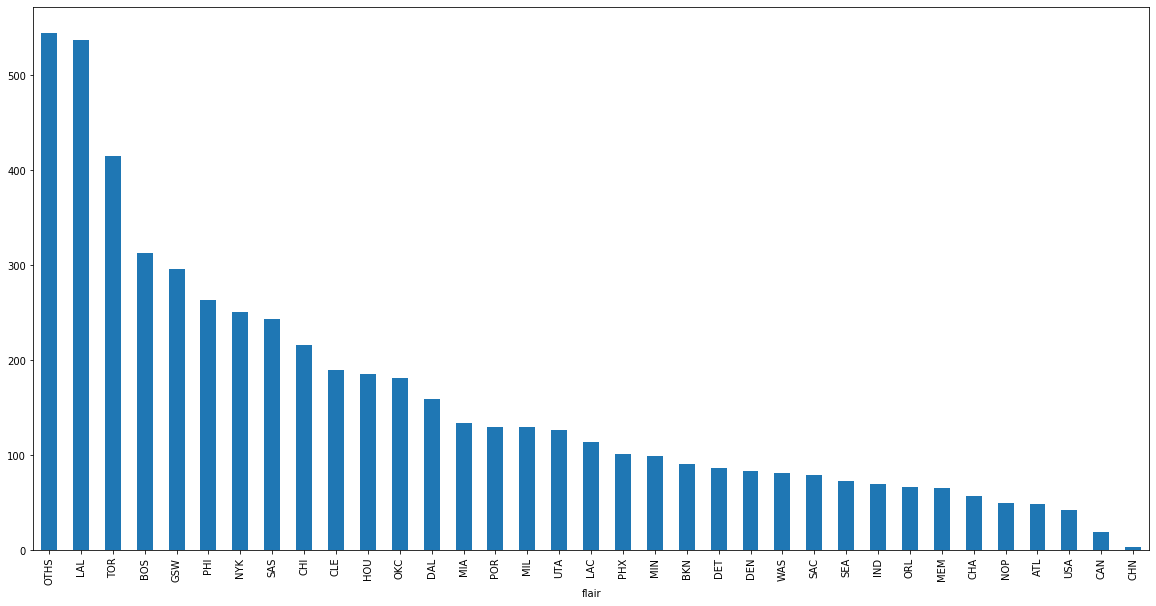

In [14]:
cnt_fans.plot.bar(figsize = (20, 10)) #fans count by team

In [15]:
cnt_fans['LAL']

537

In [16]:
cnt_fans['TOR']

415

In [17]:
cnt_fans['ATL']

49

In [18]:
cnt_fans['CHN'] # yeah! 4 fans for team China!

4

In [19]:
cnt_fans['CAN']

19

In [20]:
ds.sort_values(by = 'n_posts', ascending=False)

,user_id,flair,n_posts
111,enigmaticccc,TOR,102
4010,spnathan1,OTHS,78
774,BigPoppaPuff,CHI,67
562,cantcooklovefood,LAL,62
754,gustriandos,PHI,58
...,...,...,...
3959,Zack_of_Steel,OKC,1
3958,Douche87,NONE,1
3957,quavo_ranchero,PHX,1
3956,alicecooper777,NONE,1


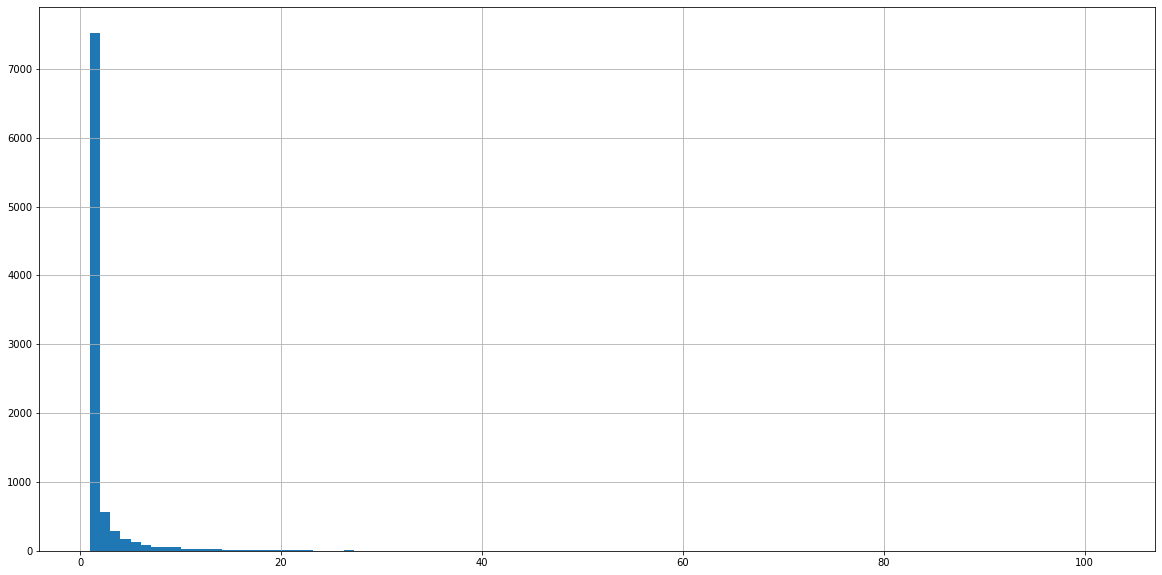

In [21]:
ds['n_posts'].hist(bins=100, figsize=(20,10))

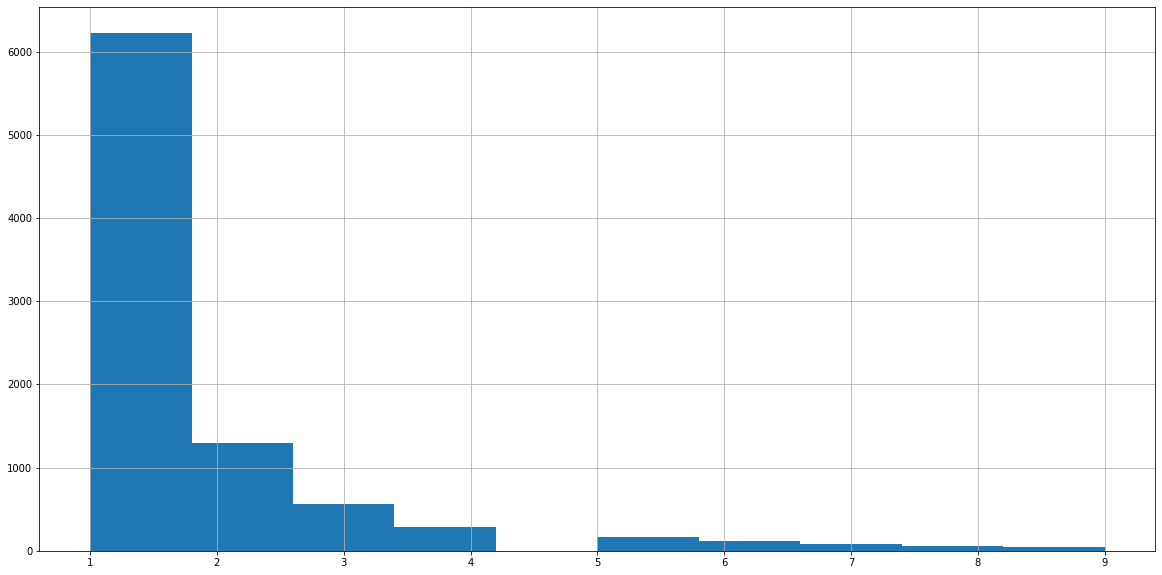

In [22]:
ds.loc[ds['n_posts']<10,'n_posts'].hist(bins = 10, figsize = (20,10))

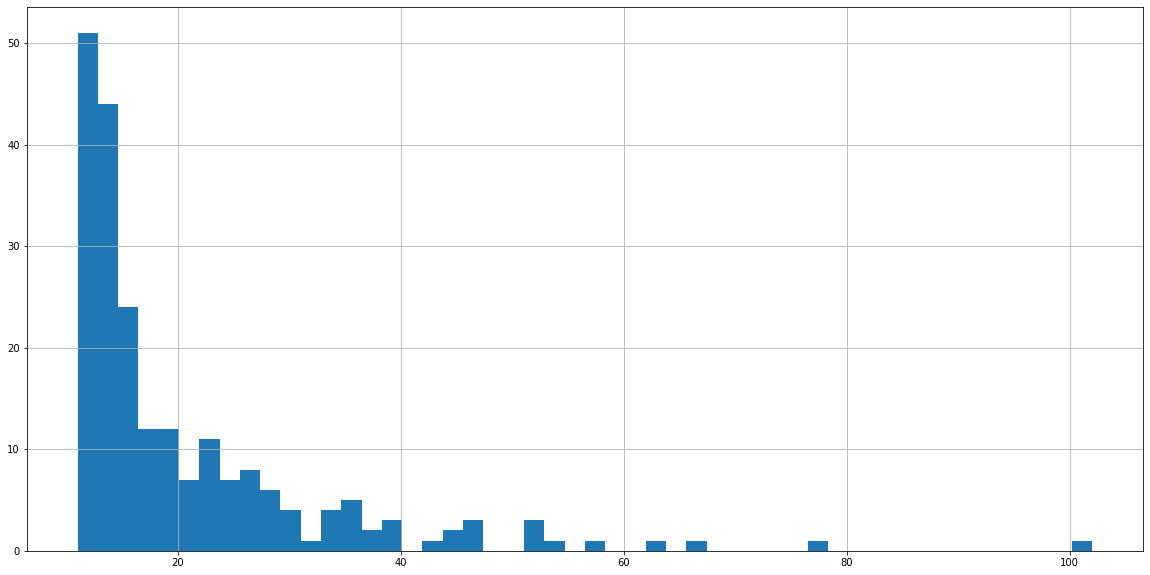

In [23]:
ds.loc[ds['n_posts']>10,'n_posts'].hist(bins = 50, figsize = (20,10))